## HEALTHCARE

In [1]:
import os
cwd = os.getcwd()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
from matplotlib import style
seaborn.set(style='ticks')
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

import numpy  as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

params = {'legend.fontsize':'xx-small',
          'figure.figsize': (6, 4),
          'axes.labelsize': 'xx-small',
          'axes.titlesize': 'xx-small',
          'xtick.labelsize':'xx-small',
          'ytick.labelsize':'xx-small'}

plt.rcParams.update(params)

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [2]:
cwd

'C:\\Users\\madan\\OneDrive\\Documents\\Healthcare Project'

In [3]:
import pandas as pd


In [4]:
df=pd.read_csv(r'Health.csv')
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
df2=pd.read_csv(r'Health.csv')

In [6]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


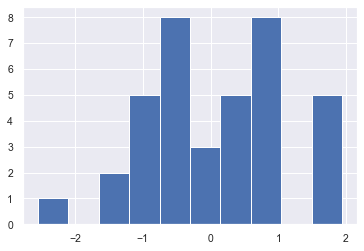

In [7]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.normal(size=(37,5)), columns=['Glucose','BMI','SkinThickness','Insulin','BloodPressure'])
df2['Glucose'].hist()


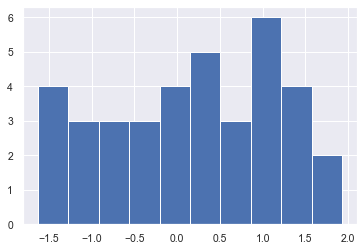

In [8]:
df2['BMI'].hist()

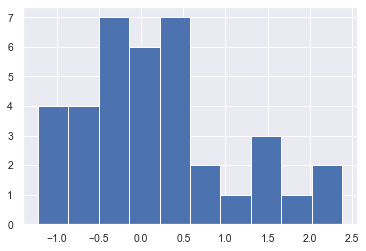

In [9]:
df2['BloodPressure'].hist()

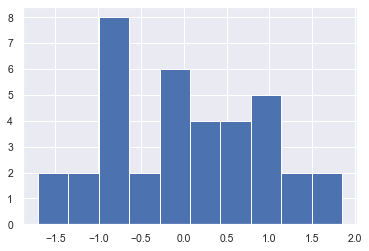

In [10]:
df2['SkinThickness'].hist()

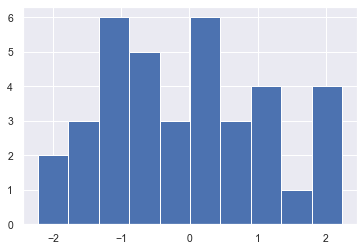

In [11]:
df2['Insulin'].hist()

In [12]:
###we will impute the median value of Blood Pressure & skinthickness to replace 0 values because the data seems to be positively
##skewed in which
## case the mean tends to shift to positive because of some outliers

In [13]:
#• Glucose
#• BloodPressure
#• SkinThickness
#• Insulin
#• BMI


In [14]:
df['Glucose'].isnull().sum()
df['BloodPressure'].isnull().sum()
df['SkinThickness'].isnull().sum()
df['Insulin'].isnull().sum()
df['BMI'].isnull().sum()

0

In [15]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [16]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [17]:
 0 in df.values

True

In [18]:
 0 in df['Glucose'].values

True

###Replacing the 0 values in Glucose column with the mean of all the values in Glucose column

In [19]:
mean_Glucose=df['Glucose'].mean(skipna=True)

In [20]:
mean_Glucose

120.89453125

In [21]:
df['Glucose']=df.Glucose.mask(df.Glucose==0,mean_Glucose)

In [22]:
 0 in df['Glucose'].values

False

In [23]:
###Sameway replacing the rest of the column 0 values with their means & median respectively

In [24]:
0 in df['BloodPressure'].values

True

In [25]:
0 in df['SkinThickness'].values

True

In [26]:
0 in df['Insulin'].values

True

In [27]:
0 in df['BMI'].values

True

In [28]:
median_BloodPressure=df['BloodPressure'].median(skipna=True)
df['BloodPressure']=df.BloodPressure.mask(df.BloodPressure==0,median_BloodPressure)

median_BloodPressure

72.0

In [29]:
median_SkinThickness=df['SkinThickness'].median(skipna=True)
df['SkinThickness']=df.SkinThickness.mask(df.SkinThickness==0,median_SkinThickness)

median_SkinThickness

23.0

In [30]:
mean_Insulin=df['Insulin'].mean(skipna=True)
df['Insulin']=df.Insulin.mask(df.Insulin==0,mean_Insulin)

mean_Insulin

79.79947916666667

In [31]:
mean_BMI=df['BMI'].mean(skipna=True)
df['BMI']=df.BMI.mask(df.BMI==0,mean_BMI)

mean_BMI

31.992578124999977

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,79.799479,33.6,0.627,50,1
1,1,85.0,66,29,79.799479,26.6,0.351,31,0
2,8,183.0,64,23,79.799479,23.3,0.672,32,1
3,1,89.0,66,23,94.000000,28.1,0.167,21,0
4,0,137.0,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.000000,32.9,0.171,63,0
764,2,122.0,70,27,79.799479,36.8,0.340,27,0
765,5,121.0,72,23,112.000000,26.2,0.245,30,0
766,1,126.0,60,23,79.799479,30.1,0.349,47,1


In [33]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

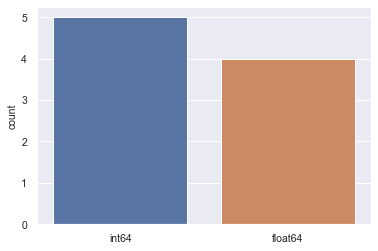

In [34]:
sns.countplot(df.dtypes.map(str))
plt.show()

In [35]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0             72             35   79.799479  33.6   
1              1     85.0             66             29   79.799479  26.6   
2              8    183.0             64             23   79.799479  23.3   
3              1     89.0             66             23   94.000000  28.1   
4              0    137.0             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0             76             48  180.000000  32.9   
764            2    122.0             70             27   79.799479  36.8   
765            5    121.0             72             23  112.000000  26.2   
766            1    126.0             60             23   79.799479  30.1   
767            1     93.0             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  

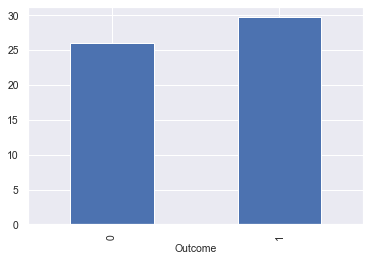

In [36]:
df.groupby(['Outcome'])['SkinThickness'].mean().plot(kind="bar")

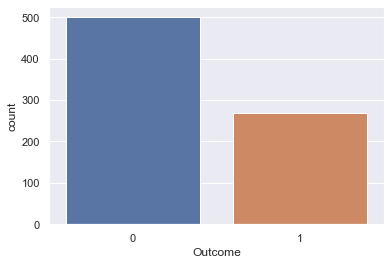

In [37]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=df)

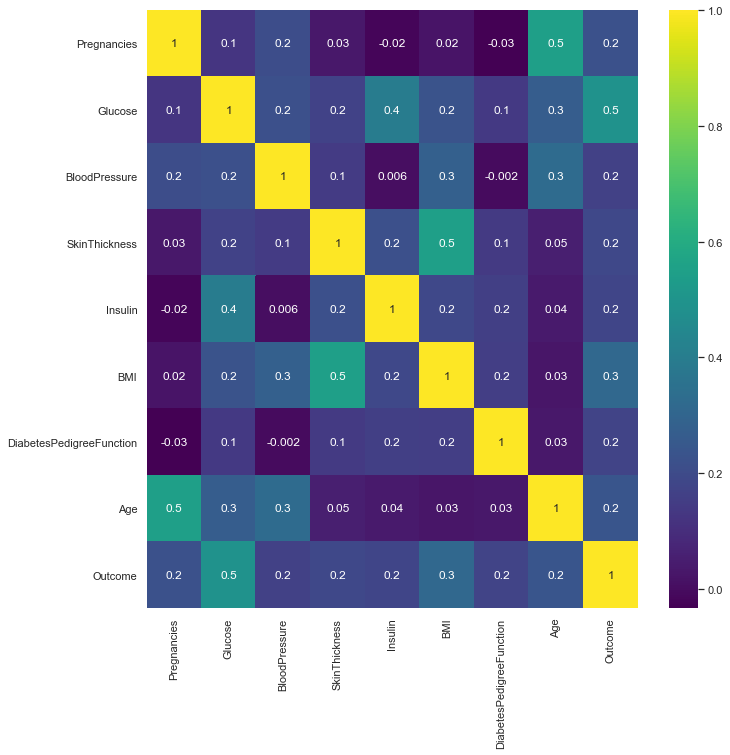

In [38]:
corr=df.corr()
plt.figure(figsize = (11,11))
sns.heatmap(corr, annot = True, fmt = '.1g', cmap = "viridis")

In [39]:
# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier

# import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [40]:
df.shape

(768, 9)

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

In [43]:
##Splitting the data:-
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.25, random_state=43)

In [44]:
x_train.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
547,4,131.0,68,21,166.000000,33.1,0.160,28
404,5,168.0,64,23,79.799479,32.9,0.135,41
12,10,139.0,80,23,79.799479,27.1,1.441,57
310,6,80.0,66,30,79.799479,26.2,0.313,41


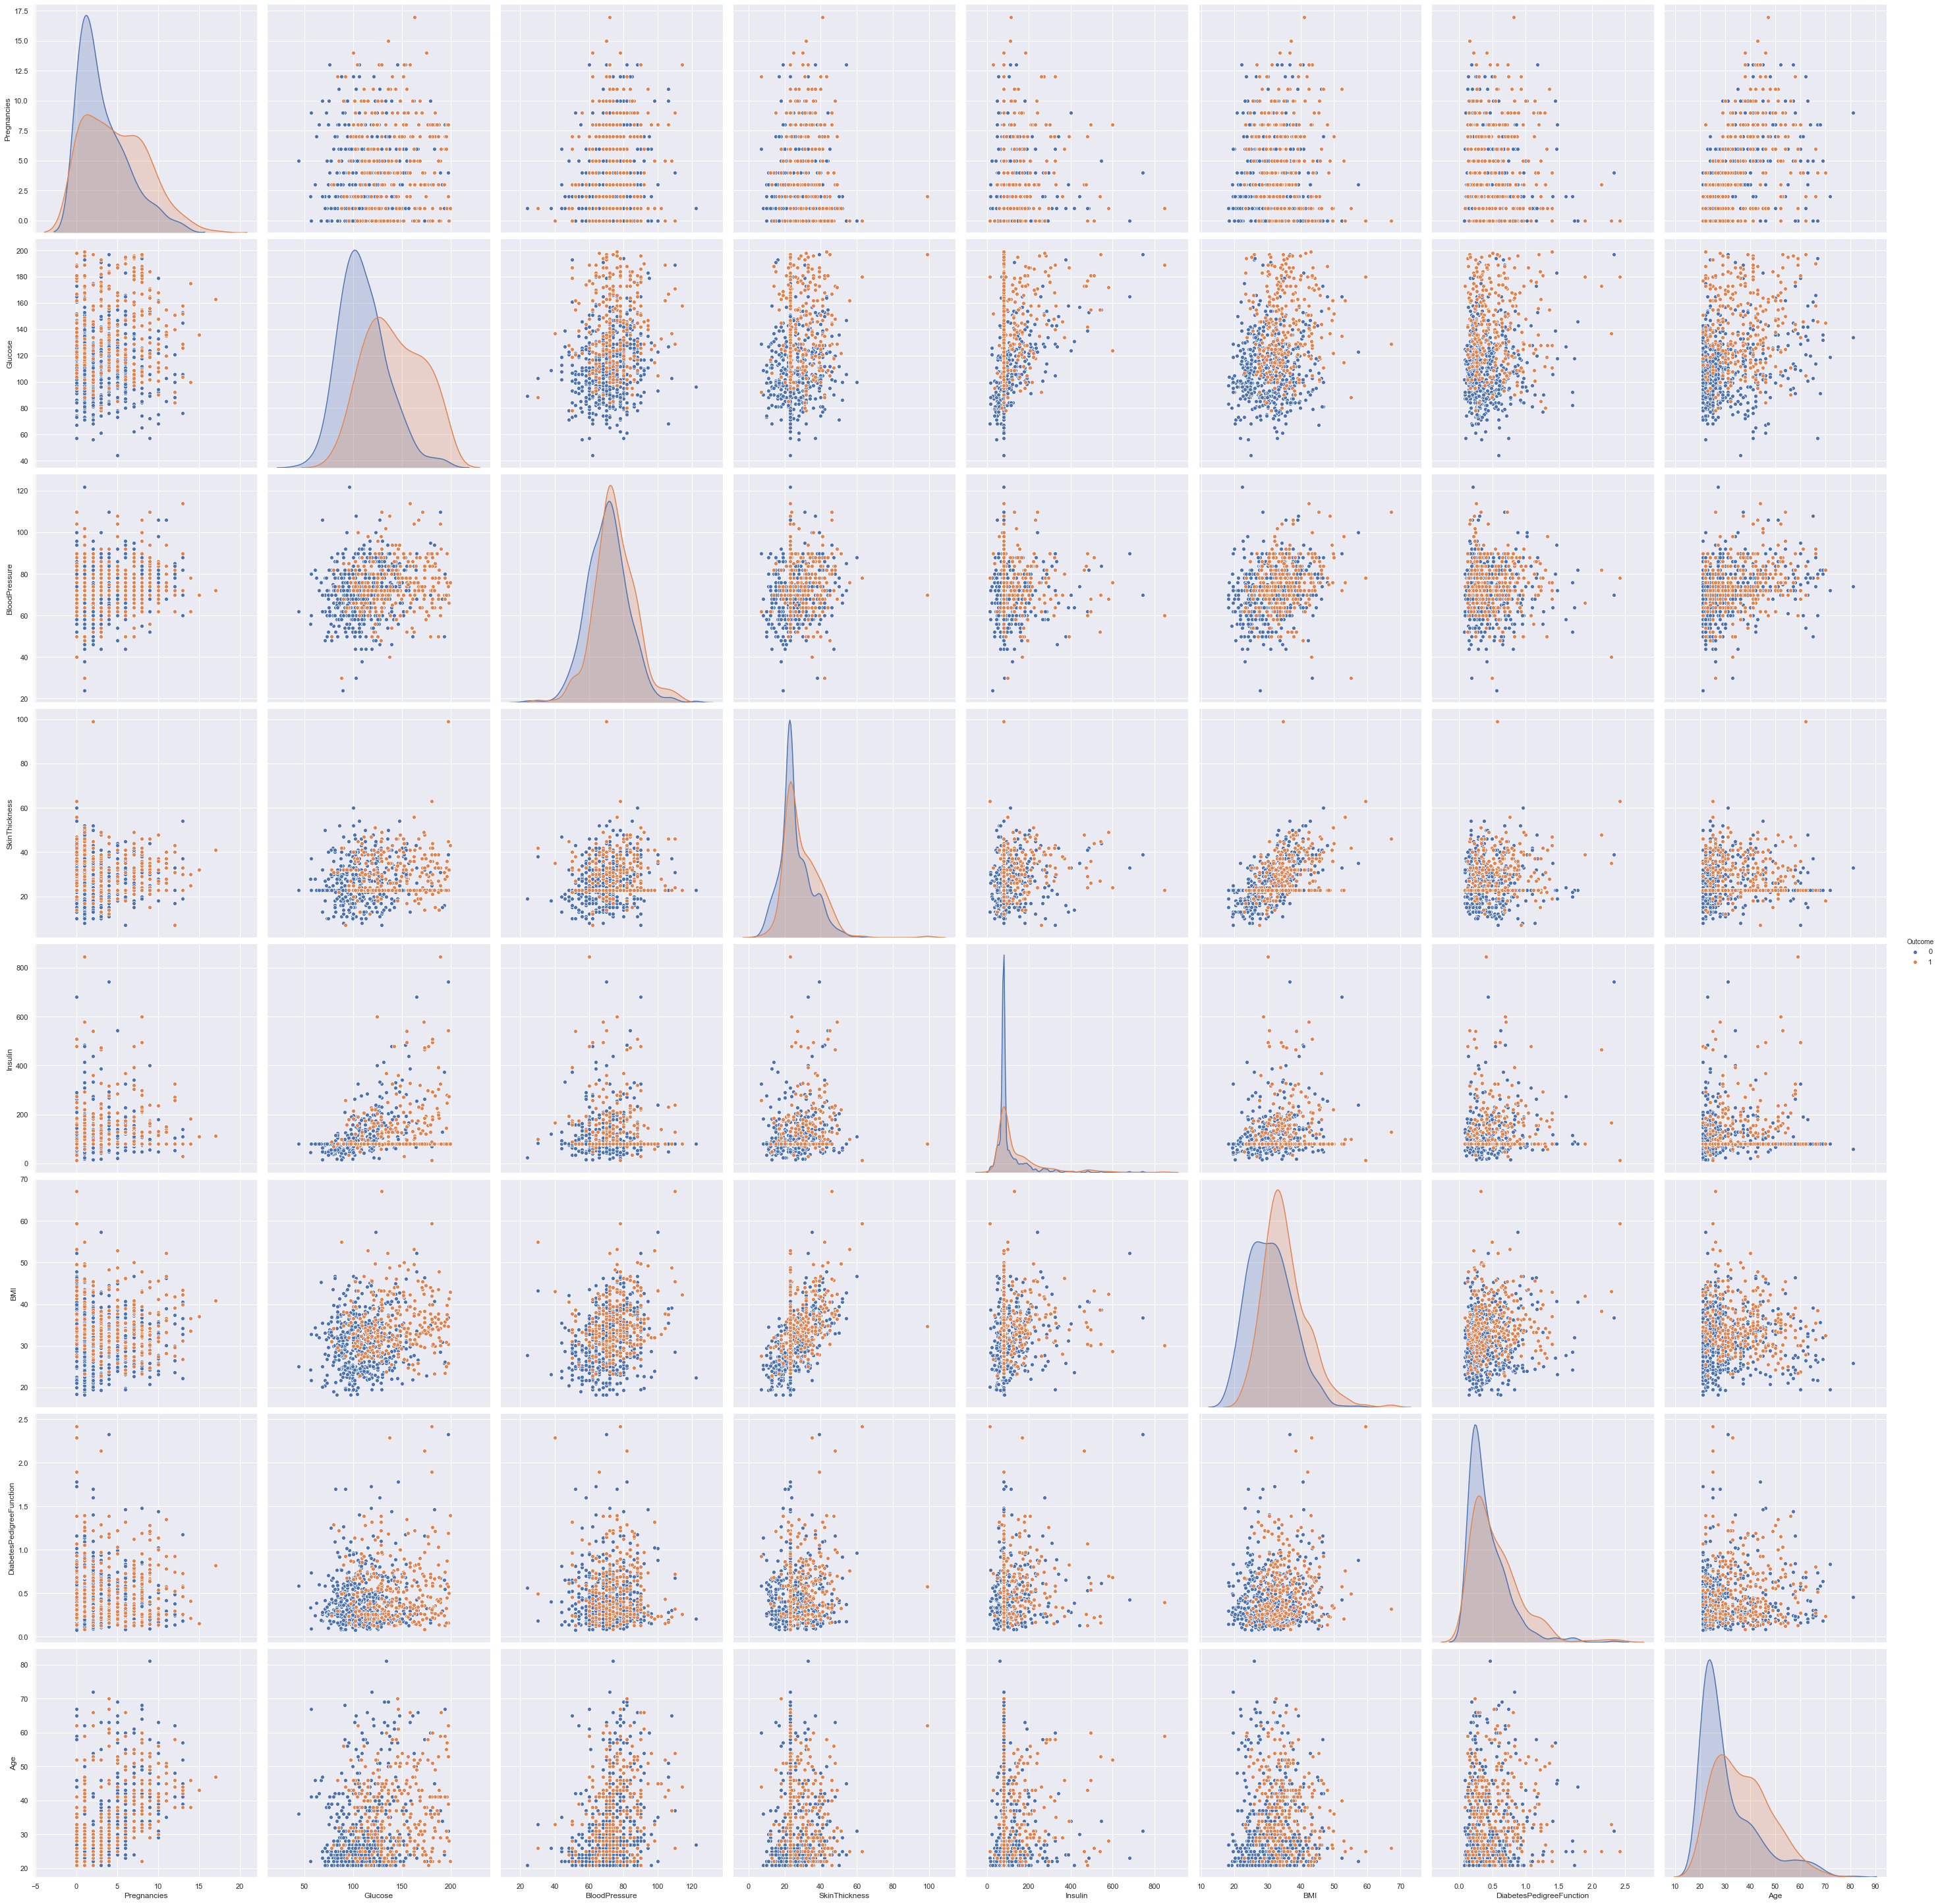

In [45]:
sns.pairplot(data=df,hue='Outcome',height=5)

In [46]:
##Initiating KNN classifier
knn=KNeighborsClassifier(n_neighbors=5)


In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred=knn.predict(x_test)

In [49]:
len(y_pred)

192

In [50]:
print(y_pred[:10])


[0 0 0 0 0 0 0 1 1 0]


In [51]:
###Confusion Matrix
metrics.confusion_matrix(y_pred,y_test)

array([[110,  25],
       [ 14,  43]], dtype=int64)

In [52]:
##Finding the accuracy of the model, bases to how many true matches we got

print("KNN model accuracy:",metrics.accuracy_score(y_test,y_pred))

KNN model accuracy: 0.796875


In [53]:
### Checking the accuracy with different paramenters with GridSearch CV and selecting the best combination


In [54]:
from sklearn.model_selection import GridSearchCV


In [55]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [56]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [57]:
n_neighbors = [3, 5, 7, 9, 11, 13, 15, 19, 23, 29]
algos       = ['ball_tree', 'kd_tree', 'brute']
dist_metric = ['minkowski']
p_root      = [1, 2, 3]
weights     = ['uniform', 'distance']
leaf_size   = [15, 30, 40, 50, 60]

In [58]:
# define the parameters
parameters = dict(
                n_neighbors= n_neighbors,
                #algorithm= algos,
                metric= dist_metric,
                p= p_root,
                weights= weights,
                #leaf_size= leaf_size
            )

print(parameters)

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 23, 29], 'metric': ['minkowski'], 'p': [1, 2, 3], 'weights': ['uniform', 'distance']}


In [59]:
# define splits
n_splits = 5

kf  = KFold(n_splits =n_splits, shuffle=True, random_state=100)


# grid search CV

In [60]:
# instantiate the grid search CV
grid = GridSearchCV(estimator = knn, 
                   param_grid = parameters, 
                   scoring    = 'accuracy',
                   cv=kf,
                   verbose=4)

In [61]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] metric=minkowski, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=uniform, score=0.681, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=uniform, score=0.696, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=uniform, score=0.696, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=uniform, score=0.678, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=uniform, score=0.643, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=1, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=distance, score=0.68

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] metric=minkowski, n_neighbors=3, p=1, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=distance, score=0.678, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=1, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=3, p=1, weights=distance, score=0.643, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=2, weights=uniform, score=0.655, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=2, weights=uniform, score=0.670, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=2, weights=uniform, score=0.713, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=3, p=2, weights=uniform, score=0.678, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, p=2, 

[CV]  metric=minkowski, n_neighbors=5, p=3, weights=distance, score=0.739, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.690, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.713, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.783, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.704, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.722, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=7, p=1, w

[CV]  metric=minkowski, n_neighbors=9, p=3, weights=uniform, score=0.713, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, p=3, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=9, p=3, weights=uniform, score=0.704, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, p=3, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=9, p=3, weights=uniform, score=0.713, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, p=3, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=9, p=3, weights=uniform, score=0.722, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, p=3, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=9, p=3, weights=distance, score=0.681, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, p=3, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=9, p=3, weights=distance, score=0.722, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, p=3, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=9, p=3, 

[CV]  metric=minkowski, n_neighbors=13, p=2, weights=distance, score=0.664, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, p=2, weights=distance .........
[CV]  metric=minkowski, n_neighbors=13, p=2, weights=distance, score=0.722, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, p=2, weights=distance .........
[CV]  metric=minkowski, n_neighbors=13, p=2, weights=distance, score=0.765, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, p=2, weights=distance .........
[CV]  metric=minkowski, n_neighbors=13, p=2, weights=distance, score=0.748, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, p=2, weights=distance .........
[CV]  metric=minkowski, n_neighbors=13, p=2, weights=distance, score=0.687, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, p=3, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors=13, p=3, weights=uniform, score=0.664, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, p=3, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors

[CV]  metric=minkowski, n_neighbors=19, p=1, weights=distance, score=0.713, total=   0.0s
[CV] metric=minkowski, n_neighbors=19, p=1, weights=distance .........
[CV]  metric=minkowski, n_neighbors=19, p=1, weights=distance, score=0.730, total=   0.0s
[CV] metric=minkowski, n_neighbors=19, p=2, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors=19, p=2, weights=uniform, score=0.716, total=   0.0s
[CV] metric=minkowski, n_neighbors=19, p=2, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors=19, p=2, weights=uniform, score=0.739, total=   0.0s
[CV] metric=minkowski, n_neighbors=19, p=2, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors=19, p=2, weights=uniform, score=0.704, total=   0.0s
[CV] metric=minkowski, n_neighbors=19, p=2, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors=19, p=2, weights=uniform, score=0.713, total=   0.0s
[CV] metric=minkowski, n_neighbors=19, p=2, weights=uniform ..........
[CV]  metric=minkowski, n_neighbors=19

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 23, 29],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=4)

In [62]:
print('Estimator: \n',    grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print(grid.classes_)
print(grid.best_score_)

Estimator: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')
Best params : 
 {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
[0 1]
0.7413493253373314


In [63]:
y_Pred=grid.predict(x_test)

In [64]:
y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [65]:
y_test

557    0
383    0
680    0
205    0
188    1
      ..
370    1
678    1
602    0
583    0
462    0
Name: Outcome, Length: 192, dtype: int64

In [66]:
cm = confusion_matrix(y_test, y_Pred) 

In [67]:
print ('Confusion Matrix :')
print(cm) 

print ('Accuracy Score :',accuracy_score(y_test, y_Pred) )
print ('Report : ')

print (classification_report(y_test, y_Pred) )

Confusion Matrix :
[[108  16]
 [ 23  45]]
Accuracy Score : 0.796875
Report : 
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       124
           1       0.74      0.66      0.70        68

    accuracy                           0.80       192
   macro avg       0.78      0.77      0.77       192
weighted avg       0.79      0.80      0.79       192



# Decision Tree

In [68]:

from sklearn import tree

In [69]:
DT = tree.DecisionTreeClassifier(criterion='entropy')
DTree = DT.fit(x_train, y_train)

In [70]:
DTy_pred=DTree.predict(x_test)

In [71]:
metrics.confusion_matrix(y_test,DTy_pred)

array([[94, 30],
       [29, 39]], dtype=int64)

In [72]:
metrics.confusion_matrix(y_test,DTy_pred)

array([[94, 30],
       [29, 39]], dtype=int64)

In [73]:
metrics.accuracy_score(y_test,DTy_pred)

0.6927083333333334

In [74]:
print(classification_report(y_test, DTy_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       124
           1       0.57      0.57      0.57        68

    accuracy                           0.69       192
   macro avg       0.66      0.67      0.67       192
weighted avg       0.69      0.69      0.69       192



# Logistic Regression


In [75]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)

C:\Users\madan\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
logy_pred=logreg.predict(x_test)

In [77]:
metrics.confusion_matrix(y_test,logy_pred)

array([[107,  17],
       [ 37,  31]], dtype=int64)

In [78]:
metrics.accuracy_score(y_test,logy_pred)

0.71875

# Random forest

In [79]:
####Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [80]:
RF=RandomForestClassifier(n_estimators=100, random_state=42)
RForest=RF.fit(x_train,y_train)

In [81]:
RFy_pred=RF.predict(x_test)

In [82]:
metrics.accuracy_score(y_test,RFy_pred)

0.7864583333333334

In [83]:
 #min_samples_split
# represents the minimum number of samples required to split an internal node. 

# This can vary between considering at least one sample at each node to 
# considering all of the samples at each node. When we increase this parameter, each tree 
# in the forest becomes more constrained as it has to consider more samples at each node. 
# Here we will vary the parameter from 10% to 100% of the samples

In [84]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
   rf.fit(x_train, y_train)
   
   # predict for all the training samples in X_train
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   
   # predict for all the training samples in X_test
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

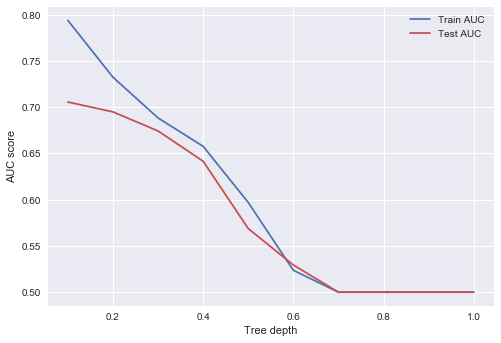

In [85]:
style.use('seaborn')

plt.plot(min_samples_splits, train_results, 'b', label= 'Train AUC')
plt.plot(min_samples_splits, test_results,  'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend();

# XGB - Using Scikit-learn Interface

# Specify training parameters
we are dealing with binary classification problem ('objective':'binary:logistic'),
we want shallow single trees with no more than 2 levels ('max_depth':2),
we don't any oupout ('silent':1),
we want algorithm to learn fast and aggressively ('learning_rate':1), (in naive named eta)
we want to iterate only 5 rounds (n_estimators)

In [86]:
import xgboost as xgb
from xgboost import XGBClassifier

In [87]:
params2= {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

In [88]:
bst = XGBClassifier(**params2).fit(x_train, y_train)

[09:13:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [89]:
xgby_pred=bst.predict(x_test)

In [90]:
metrics.confusion_matrix(y_test,xgby_pred)


array([[107,  17],
       [ 30,  38]], dtype=int64)

In [91]:
metrics.accuracy_score(y_test,xgby_pred)


0.7552083333333334

In [92]:
print(classification_report(y_test, xgby_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       124
           1       0.69      0.56      0.62        68

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



# COMPARISON OF ALL THE MACHINE LEARNING ALGORITHMS USED:

In [93]:
print("KNN model accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
print ('GridCV Accuracy Score :',metrics.accuracy_score(y_test, y_Pred)*100 )
print ('Decision Tree Accuracy Score :',metrics.accuracy_score(y_test,DTy_pred)*100)
print ('Logistic Regression Accuracy Score :',metrics.accuracy_score(y_test,logy_pred)*100)
print ('Random Forest Accuracy Score :',metrics.accuracy_score(y_test,RFy_pred)*100)
print ('XGboost Accuracy Score :',metrics.accuracy_score(y_test,xgby_pred)*100)

KNN model accuracy: 64.58333333333334
GridCV Accuracy Score : 79.6875
Decision Tree Accuracy Score : 69.27083333333334
Logistic Regression Accuracy Score : 71.875
Random Forest Accuracy Score : 78.64583333333334
XGboost Accuracy Score : 75.52083333333334


#### It can be clearly seen that GridSearch CV performs with the best accuracy on the Test samples, followed by Random Forest